# Example of the aitlas toolbox in the context of image segmentation

## Import the required packages

In [ ]:
from aitlas.utils import image_loader
from aitlas.models import DeepLabV3
from aitlas.models import DeepLabV3_13_bands
from aitlas.transforms import ResizeToTensor

## Visualize images and masks

Total number of patches: 9251


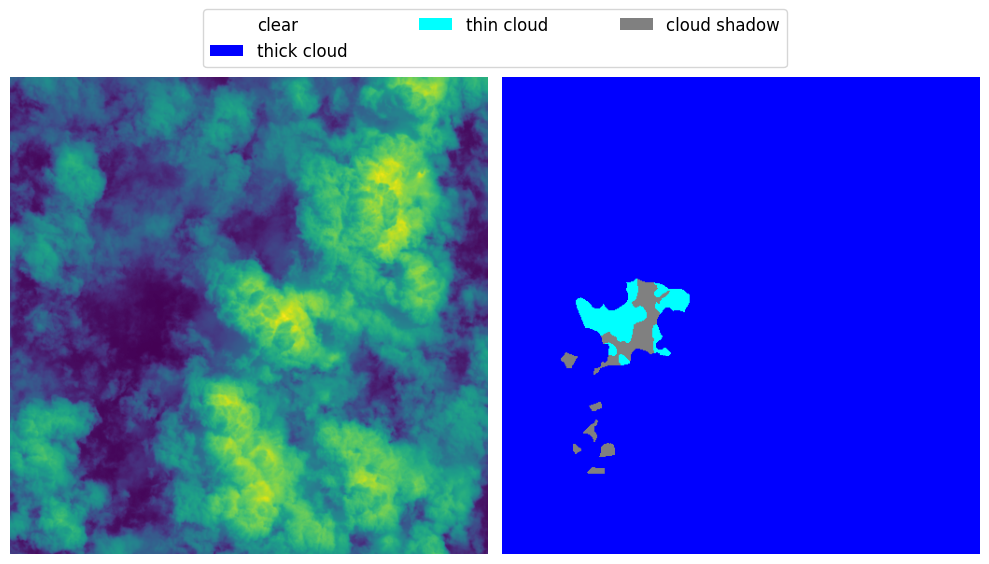

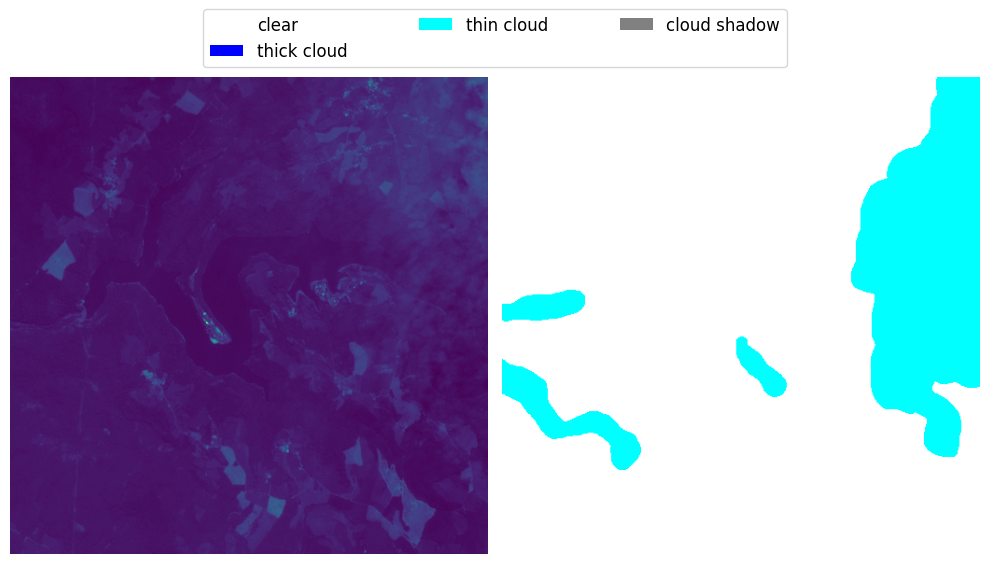

In [9]:
#plots band B02
dataset_config = {
    "data_dir": "/home/dragik/data/KappaSet",
    "selection":"rgb"
}
dataset = KappaSet_AI4QCDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(4);
dataset.show_image(10);

In [3]:
dataset.data_distribution_table()

,Number of pixels
clear,891173952.0
thick cloud,703541504.0
thin cloud,551806016.0
cloud shadow,168076624.0


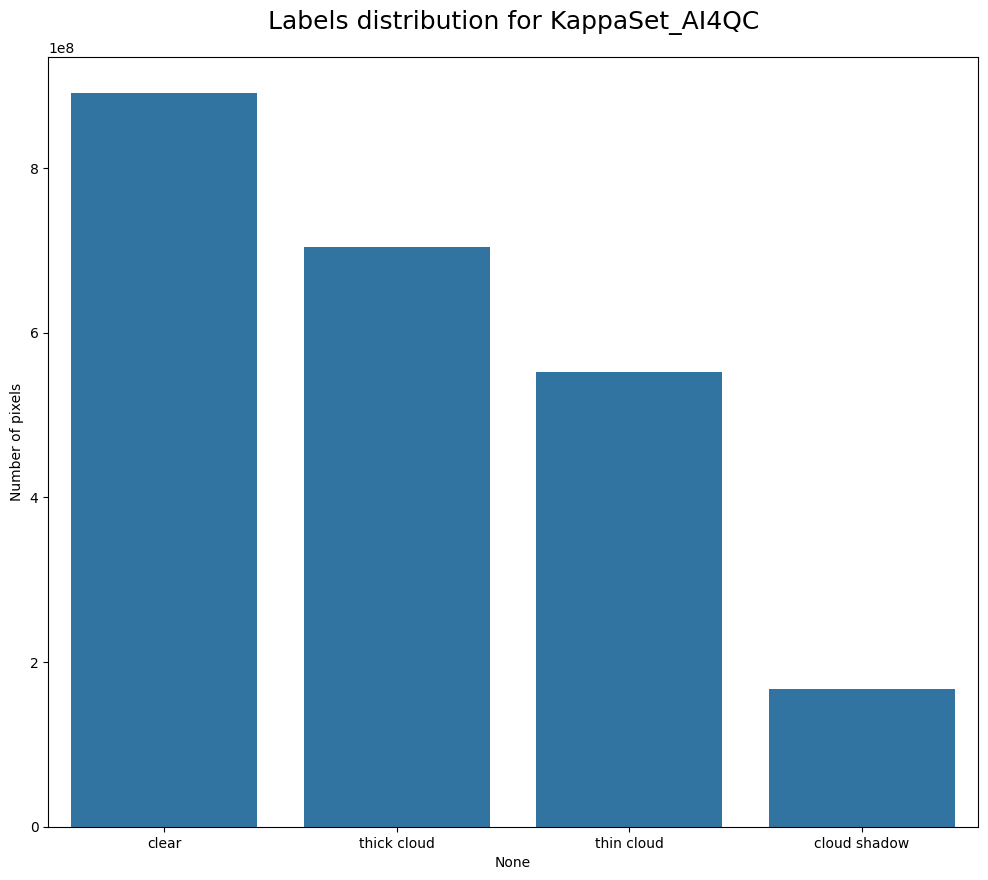

In [4]:
dataset.data_distribution_barchart();

# Working with Sentinel-2 true color RGB images

## Load training data

In [16]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 4,
    "selection":"rgb",
    "data_dir": "/home/dragik/data/KappaSet",
    "transforms": ["aitlas.transforms.ResizePerChannelToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"],
}
train_dataset = KappaSet_AI4QCDataset(train_dataset_config)
len(train_dataset)

9251

## Create the model

In [17]:
epochs = 5
model_directory = "/home/dragik/data/KappaSet/experiments_rgb"
model_config = {
    "num_classes": 4, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [18]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training:   4%|███                                                                    | 99/2313 [00:07<01:55, 19.23it/s]

[1, 100], loss:  0.57366


training:   9%|██████                                                                | 199/2313 [00:12<01:48, 19.43it/s]

[1, 200], loss:  0.50304


training:  13%|█████████                                                             | 299/2313 [00:17<01:48, 18.60it/s]

[1, 300], loss:  0.45689


training:  17%|████████████                                                          | 399/2313 [00:22<01:41, 18.90it/s]

[1, 400], loss:  0.43144


training:  22%|███████████████                                                       | 499/2313 [00:28<01:36, 18.86it/s]

[1, 500], loss:  0.41161


training:  26%|██████████████████▏                                                   | 599/2313 [00:33<01:30, 19.02it/s]

[1, 600], loss:  0.38626


training:  30%|█████████████████████▏                                                | 699/2313 [00:38<01:26, 18.75it/s]

[1, 700], loss:  0.37736


training:  35%|████████████████████████▏                                             | 799/2313 [00:44<01:21, 18.67it/s]

[1, 800], loss:  0.35237


training:  39%|███████████████████████████▏                                          | 899/2313 [00:49<01:14, 18.95it/s]

[1, 900], loss:  0.33223


training:  43%|██████████████████████████████▏                                       | 999/2313 [00:54<01:09, 19.02it/s]

[1, 1000], loss:  0.32786


training:  48%|████████████████████████████████▊                                    | 1099/2313 [01:00<01:03, 19.02it/s]

[1, 1100], loss:  0.34583


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [01:05<00:58, 19.12it/s]

[1, 1200], loss:  0.33083


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [01:10<00:53, 18.98it/s]

[1, 1300], loss:  0.30354


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [01:15<00:48, 19.04it/s]

[1, 1400], loss:  0.31961


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [01:21<00:42, 18.95it/s]

[1, 1500], loss:  0.29362


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [01:26<00:37, 18.97it/s]

[1, 1600], loss:  0.31211


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [01:31<00:32, 19.07it/s]

[1, 1700], loss:  0.30734


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [01:36<00:27, 19.01it/s]

[1, 1800], loss:  0.30118


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [01:42<00:21, 19.10it/s]

[1, 1900], loss:  0.29944


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [01:47<00:16, 19.03it/s]

[1, 2000], loss:  0.28587


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [01:52<00:11, 18.92it/s]

[1, 2100], loss:  0.27021


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [01:57<00:06, 18.94it/s]

[1, 2200], loss:  0.26734


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [02:03<00:00, 19.01it/s]

[1, 2300], loss:  0.28502


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [02:04<00:00, 18.61it/s]

epoch: 1, time: 124, loss:  0.35043



testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [00:41<00:00, 55.50it/s]

IOU:0.5822478691312541, IOU mean:0.4940127732362568, IOU per Class:[0.63064688 0.7343598  0.35677824 0.25426617]



training:   4%|███                                                                    | 99/2313 [00:05<01:58, 18.63it/s]

[2, 100], loss:  0.26910


training:   9%|██████                                                                | 199/2313 [00:11<01:54, 18.48it/s]

[2, 200], loss:  0.28321


training:  13%|█████████                                                             | 299/2313 [00:16<01:46, 18.93it/s]

[2, 300], loss:  0.29426


training:  17%|████████████                                                          | 399/2313 [00:22<01:42, 18.60it/s]

[2, 400], loss:  0.29432


training:  22%|███████████████                                                       | 499/2313 [00:27<01:36, 18.76it/s]

[2, 500], loss:  0.24568


training:  26%|██████████████████▏                                                   | 599/2313 [00:32<01:31, 18.77it/s]

[2, 600], loss:  0.27503


training:  30%|█████████████████████▏                                                | 699/2313 [00:38<01:26, 18.63it/s]

[2, 700], loss:  0.24942


training:  35%|████████████████████████▏                                             | 799/2313 [00:43<01:20, 18.69it/s]

[2, 800], loss:  0.26478


training:  39%|███████████████████████████▏                                          | 899/2313 [00:48<01:15, 18.79it/s]

[2, 900], loss:  0.26944


training:  43%|██████████████████████████████▏                                       | 999/2313 [00:54<01:10, 18.64it/s]

[2, 1000], loss:  0.26263


training:  48%|████████████████████████████████▊                                    | 1099/2313 [00:59<01:04, 18.73it/s]

[2, 1100], loss:  0.26393


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [01:04<00:59, 18.63it/s]

[2, 1200], loss:  0.24206


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [01:10<00:53, 18.79it/s]

[2, 1300], loss:  0.27261


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [01:15<00:48, 18.69it/s]

[2, 1400], loss:  0.26866


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [01:21<00:43, 18.56it/s]

[2, 1500], loss:  0.23779


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [01:26<00:38, 18.65it/s]

[2, 1600], loss:  0.27241


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [01:31<00:32, 18.83it/s]

[2, 1700], loss:  0.24801


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [01:37<00:27, 18.86it/s]

[2, 1800], loss:  0.24683


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [01:42<00:22, 18.68it/s]

[2, 1900], loss:  0.25702


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [01:47<00:16, 18.64it/s]

[2, 2000], loss:  0.24105


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [01:53<00:11, 18.74it/s]

[2, 2100], loss:  0.24933


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [01:58<00:06, 18.70it/s]

[2, 2200], loss:  0.27230


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [02:03<00:00, 18.62it/s]

[2, 2300], loss:  0.24013


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [02:04<00:00, 18.53it/s]

epoch: 2, time: 125, loss:  0.26150



testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [00:43<00:00, 53.70it/s]

IOU:0.6140492630886554, IOU mean:0.5527572186563493, IOU per Class:[0.67262017 0.70984962 0.45836212 0.37019696]



training:   4%|███                                                                    | 99/2313 [00:05<01:58, 18.61it/s]

[3, 100], loss:  0.23049


training:   9%|██████                                                                | 199/2313 [00:11<01:52, 18.74it/s]

[3, 200], loss:  0.24244


training:  13%|█████████                                                             | 299/2313 [00:16<01:46, 18.85it/s]

[3, 300], loss:  0.24409


training:  17%|████████████                                                          | 399/2313 [00:21<01:42, 18.58it/s]

[3, 400], loss:  0.21828


training:  22%|███████████████                                                       | 499/2313 [00:27<01:37, 18.62it/s]

[3, 500], loss:  0.24028


training:  26%|██████████████████▏                                                   | 599/2313 [00:32<01:32, 18.46it/s]

[3, 600], loss:  0.24243


training:  30%|█████████████████████▏                                                | 699/2313 [00:37<01:26, 18.58it/s]

[3, 700], loss:  0.25656


training:  35%|████████████████████████▏                                             | 799/2313 [00:43<01:20, 18.72it/s]

[3, 800], loss:  0.25091


training:  39%|███████████████████████████▏                                          | 899/2313 [00:48<01:16, 18.51it/s]

[3, 900], loss:  0.24198


training:  43%|██████████████████████████████▏                                       | 999/2313 [00:54<01:10, 18.60it/s]

[3, 1000], loss:  0.22297


training:  48%|████████████████████████████████▊                                    | 1099/2313 [00:59<01:05, 18.58it/s]

[3, 1100], loss:  0.22637


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [01:04<01:00, 18.43it/s]

[3, 1200], loss:  0.23469


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [01:10<00:54, 18.52it/s]

[3, 1300], loss:  0.23172


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [01:15<00:49, 18.55it/s]

[3, 1400], loss:  0.23999


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [01:20<00:43, 18.66it/s]

[3, 1500], loss:  0.24659


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [01:26<00:38, 18.59it/s]

[3, 1600], loss:  0.23625


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [01:31<00:33, 18.54it/s]

[3, 1700], loss:  0.22979


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [01:37<00:27, 18.68it/s]

[3, 1800], loss:  0.23691


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [01:42<00:22, 18.63it/s]

[3, 1900], loss:  0.21484


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [01:47<00:16, 18.65it/s]

[3, 2000], loss:  0.24873


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [01:53<00:11, 18.62it/s]

[3, 2100], loss:  0.24044


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [01:58<00:06, 18.67it/s]

[3, 2200], loss:  0.23673


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [02:03<00:00, 18.58it/s]

[3, 2300], loss:  0.24170


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [02:04<00:00, 18.53it/s]

epoch: 3, time: 125, loss:  0.23722



testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [00:41<00:00, 55.53it/s]

IOU:0.6496465689376539, IOU mean:0.5885059750932364, IOU per Class:[0.71630443 0.74655209 0.48149739 0.40966999]



training:   4%|███                                                                    | 99/2313 [00:05<02:01, 18.19it/s]

[4, 100], loss:  0.23086


training:   9%|██████                                                                | 199/2313 [00:11<01:54, 18.42it/s]

[4, 200], loss:  0.22840


training:  13%|█████████                                                             | 299/2313 [00:16<01:52, 17.91it/s]

[4, 300], loss:  0.21293


training:  17%|████████████                                                          | 399/2313 [00:22<01:44, 18.31it/s]

[4, 400], loss:  0.24361


training:  22%|███████████████                                                       | 499/2313 [00:27<01:38, 18.44it/s]

[4, 500], loss:  0.22844


training:  26%|██████████████████▏                                                   | 599/2313 [00:33<01:35, 18.04it/s]

[4, 600], loss:  0.23573


training:  30%|█████████████████████▏                                                | 699/2313 [00:38<01:27, 18.39it/s]

[4, 700], loss:  0.22207


training:  35%|████████████████████████▏                                             | 799/2313 [00:44<01:22, 18.42it/s]

[4, 800], loss:  0.20696


training:  39%|███████████████████████████▏                                          | 899/2313 [00:49<01:16, 18.57it/s]

[4, 900], loss:  0.22396


training:  43%|██████████████████████████████▏                                       | 999/2313 [00:54<01:11, 18.48it/s]

[4, 1000], loss:  0.23501


training:  48%|████████████████████████████████▊                                    | 1099/2313 [01:00<01:05, 18.57it/s]

[4, 1100], loss:  0.23718


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [01:05<00:59, 18.58it/s]

[4, 1200], loss:  0.24578


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [01:11<00:54, 18.57it/s]

[4, 1300], loss:  0.24264


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [01:16<00:49, 18.55it/s]

[4, 1400], loss:  0.20757


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [01:21<00:44, 18.48it/s]

[4, 1500], loss:  0.22606


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [01:27<00:38, 18.57it/s]

[4, 1600], loss:  0.21778


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [01:32<00:33, 18.58it/s]

[4, 1700], loss:  0.22871


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [01:37<00:28, 18.20it/s]

[4, 1800], loss:  0.22068


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [01:43<00:22, 18.27it/s]

[4, 1900], loss:  0.22574


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [01:48<00:16, 18.68it/s]

[4, 2000], loss:  0.22218


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [01:54<00:11, 18.40it/s]

[4, 2100], loss:  0.23136


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [01:59<00:06, 18.45it/s]

[4, 2200], loss:  0.21597


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [02:05<00:00, 18.50it/s]

[4, 2300], loss:  0.22762


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [02:05<00:00, 18.36it/s]

epoch: 4, time: 126, loss:  0.22670



testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [00:43<00:00, 52.88it/s]

IOU:0.6330682580877622, IOU mean:0.5699154822332124, IOU per Class:[0.7097091  0.72065551 0.47592749 0.37336983]



training:   4%|███                                                                    | 99/2313 [00:05<01:59, 18.52it/s]

[5, 100], loss:  0.22395


training:   9%|██████                                                                | 199/2313 [00:11<01:53, 18.58it/s]

[5, 200], loss:  0.21556


training:  13%|█████████                                                             | 299/2313 [00:16<01:49, 18.39it/s]

[5, 300], loss:  0.20851


training:  17%|████████████                                                          | 399/2313 [00:22<01:44, 18.36it/s]

[5, 400], loss:  0.22308


training:  22%|███████████████                                                       | 499/2313 [00:27<01:39, 18.29it/s]

[5, 500], loss:  0.23513


training:  26%|██████████████████▏                                                   | 599/2313 [00:33<01:33, 18.27it/s]

[5, 600], loss:  0.20934


training:  30%|█████████████████████▏                                                | 699/2313 [00:38<01:28, 18.24it/s]

[5, 700], loss:  0.21934


training:  35%|████████████████████████▏                                             | 799/2313 [00:44<01:21, 18.61it/s]

[5, 800], loss:  0.22154


training:  39%|███████████████████████████▏                                          | 899/2313 [00:49<01:17, 18.21it/s]

[5, 900], loss:  0.22096


training:  43%|██████████████████████████████▏                                       | 999/2313 [00:54<01:11, 18.40it/s]

[5, 1000], loss:  0.21583


training:  48%|████████████████████████████████▊                                    | 1099/2313 [01:00<01:06, 18.25it/s]

[5, 1100], loss:  0.22730


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [01:05<01:00, 18.36it/s]

[5, 1200], loss:  0.21050


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [01:11<00:55, 18.34it/s]

[5, 1300], loss:  0.24017


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [01:16<00:49, 18.31it/s]

[5, 1400], loss:  0.23178


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [01:22<00:44, 18.30it/s]

[5, 1500], loss:  0.23887


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [01:27<00:38, 18.33it/s]

[5, 1600], loss:  0.22778


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [01:33<00:33, 18.35it/s]

[5, 1700], loss:  0.23021


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [01:38<00:28, 18.31it/s]

[5, 1800], loss:  0.21501


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [01:44<00:22, 18.07it/s]

[5, 1900], loss:  0.21033


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [01:49<00:17, 18.27it/s]

[5, 2000], loss:  0.21836


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [01:55<00:11, 18.36it/s]

[5, 2100], loss:  0.21912


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [02:00<00:06, 18.38it/s]

[5, 2200], loss:  0.22146


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [02:05<00:00, 18.31it/s]

[5, 2300], loss:  0.20579


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [02:07<00:00, 18.21it/s]

epoch: 5, time: 127, loss:  0.22134



testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [00:42<00:00, 54.85it/s]

IOU:0.616466321205747, IOU mean:0.5598878217936853, IOU per Class:[0.68988523 0.72568184 0.45981267 0.36417155]


Train loss: [0.26737271509432375, 0.24072123711050658, 0.21292061542719845, 0.2322224850474712, 0.2360958965091934]
Validation loss: []
Train time per epochs: [124, 125, 125, 126, 127]
Finished training. training time: 627


# Working with the 13 bands of Sentinel-2

## Load training data

In [6]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "selection":"all",
    "data_dir": "/home/dragik/data/KappaSet",
    "transforms": ["aitlas.transforms.ResizePerChannelToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"],
}
train_dataset = KappaSet_AI4QCDataset(train_dataset_config)
len(train_dataset)

9251

## Create the model

In [7]:
epochs = 5
model_directory = "/home/dragik/data/KappaSet/experiments"
model_config = {
    "num_classes": 4, 
    "learning_rate": 0.0001,
    "pretrained": False, 
    "threshold": 0.5,
    "metrics": ["iou"],
    "input_dim": 13
}

model = DeepLabV3_13_bands(model_config)
model.prepare()

## Start the training

In [8]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training:   4%|███                                                                    | 99/2313 [01:02<23:28,  1.57it/s]

[1, 100], loss:  0.52482


training:   9%|██████                                                                | 199/2313 [02:05<21:39,  1.63it/s]

[1, 200], loss:  0.46989


training:  13%|█████████                                                             | 299/2313 [03:08<21:14,  1.58it/s]

[1, 300], loss:  0.41918


training:  17%|████████████                                                          | 399/2313 [04:09<19:01,  1.68it/s]

[1, 400], loss:  0.39923


training:  22%|███████████████                                                       | 499/2313 [05:09<19:38,  1.54it/s]

[1, 500], loss:  0.38052


training:  26%|██████████████████▏                                                   | 599/2313 [06:08<16:53,  1.69it/s]

[1, 600], loss:  0.37776


training:  30%|█████████████████████▏                                                | 699/2313 [07:08<16:00,  1.68it/s]

[1, 700], loss:  0.36686


training:  35%|████████████████████████▏                                             | 799/2313 [08:08<14:58,  1.68it/s]

[1, 800], loss:  0.34009


training:  39%|███████████████████████████▏                                          | 899/2313 [09:08<13:58,  1.69it/s]

[1, 900], loss:  0.34504


training:  43%|██████████████████████████████▏                                       | 999/2313 [10:08<12:53,  1.70it/s]

[1, 1000], loss:  0.33054


training:  48%|████████████████████████████████▊                                    | 1099/2313 [11:07<12:29,  1.62it/s]

[1, 1100], loss:  0.32653


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [12:07<11:04,  1.68it/s]

[1, 1200], loss:  0.30396


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [13:07<10:08,  1.67it/s]

[1, 1300], loss:  0.32402


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [14:07<08:59,  1.70it/s]

[1, 1400], loss:  0.28621


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [15:06<08:01,  1.69it/s]

[1, 1500], loss:  0.31282


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [16:06<07:02,  1.69it/s]

[1, 1600], loss:  0.28060


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [17:06<06:08,  1.67it/s]

[1, 1700], loss:  0.30060


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [18:05<05:04,  1.69it/s]

[1, 1800], loss:  0.30951


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [19:05<04:05,  1.69it/s]

[1, 1900], loss:  0.30428


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [20:05<03:07,  1.68it/s]

[1, 2000], loss:  0.27257


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [21:04<02:06,  1.69it/s]

[1, 2100], loss:  0.26771


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [22:04<01:07,  1.68it/s]

[1, 2200], loss:  0.25180


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [23:03<00:08,  1.67it/s]

[1, 2300], loss:  0.26629


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [23:12<00:00,  1.66it/s]

epoch: 1, time: 1392, loss:  0.33678



testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [20:00<00:00,  1.93it/s]

IOU:0.6264392769865288, IOU mean:0.5646636404613822, IOU per Class:[0.68282633 0.75633594 0.4316843  0.38780799]



training:   4%|███                                                                    | 99/2313 [01:04<24:04,  1.53it/s]

[2, 100], loss:  0.26898


training:   9%|██████                                                                | 199/2313 [02:10<23:01,  1.53it/s]

[2, 200], loss:  0.26921


training:  13%|█████████                                                             | 299/2313 [03:16<22:58,  1.46it/s]

[2, 300], loss:  0.25901


training:  17%|████████████                                                          | 399/2313 [04:21<20:32,  1.55it/s]

[2, 400], loss:  0.25239


training:  22%|███████████████                                                       | 499/2313 [05:24<19:05,  1.58it/s]

[2, 500], loss:  0.25352


training:  26%|██████████████████▏                                                   | 599/2313 [06:27<17:46,  1.61it/s]

[2, 600], loss:  0.29378


training:  30%|█████████████████████▏                                                | 699/2313 [07:31<16:43,  1.61it/s]

[2, 700], loss:  0.24919


training:  35%|████████████████████████▏                                             | 799/2313 [08:35<16:32,  1.53it/s]

[2, 800], loss:  0.27916


training:  39%|███████████████████████████▏                                          | 899/2313 [09:38<15:00,  1.57it/s]

[2, 900], loss:  0.25939


training:  43%|██████████████████████████████▏                                       | 999/2313 [10:43<14:13,  1.54it/s]

[2, 1000], loss:  0.26584


training:  48%|████████████████████████████████▊                                    | 1099/2313 [11:48<13:51,  1.46it/s]

[2, 1100], loss:  0.26679


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [12:52<11:47,  1.58it/s]

[2, 1200], loss:  0.24257


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [13:56<10:50,  1.56it/s]

[2, 1300], loss:  0.23539


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [15:01<09:43,  1.57it/s]

[2, 1400], loss:  0.26647


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [16:05<09:03,  1.50it/s]

[2, 1500], loss:  0.24904


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [17:11<07:41,  1.55it/s]

[2, 1600], loss:  0.24191


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [18:16<06:31,  1.57it/s]

[2, 1700], loss:  0.23852


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [19:22<05:30,  1.55it/s]

[2, 1800], loss:  0.25338


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [20:28<04:33,  1.51it/s]

[2, 1900], loss:  0.24898


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [21:34<03:23,  1.54it/s]

[2, 2000], loss:  0.25245


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [22:39<02:17,  1.55it/s]

[2, 2100], loss:  0.22625


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [23:45<01:13,  1.55it/s]

[2, 2200], loss:  0.22448


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [24:49<00:09,  1.55it/s]

[2, 2300], loss:  0.25247


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [24:58<00:00,  1.54it/s]

epoch: 2, time: 1498, loss:  0.25418



testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [21:02<00:00,  1.83it/s]

IOU:0.6463640695717737, IOU mean:0.6006707925868784, IOU per Class:[0.71162429 0.76882186 0.47908764 0.44314938]



training:   4%|███                                                                    | 99/2313 [01:00<22:13,  1.66it/s]

[3, 100], loss:  0.25272


training:   9%|██████                                                                | 199/2313 [02:01<21:07,  1.67it/s]

[3, 200], loss:  0.23636


training:  13%|█████████                                                             | 299/2313 [03:04<21:32,  1.56it/s]

[3, 300], loss:  0.22832


training:  17%|████████████                                                          | 399/2313 [04:09<20:21,  1.57it/s]

[3, 400], loss:  0.24683


training:  22%|███████████████                                                       | 499/2313 [05:14<19:34,  1.54it/s]

[3, 500], loss:  0.23278


training:  26%|██████████████████▏                                                   | 599/2313 [06:20<18:36,  1.54it/s]

[3, 600], loss:  0.21093


training:  30%|█████████████████████▏                                                | 699/2313 [07:26<17:34,  1.53it/s]

[3, 700], loss:  0.22176


training:  35%|████████████████████████▏                                             | 799/2313 [08:31<15:43,  1.60it/s]

[3, 800], loss:  0.22494


training:  39%|███████████████████████████▏                                          | 899/2313 [09:34<14:49,  1.59it/s]

[3, 900], loss:  0.22041


training:  43%|██████████████████████████████▏                                       | 999/2313 [10:39<13:49,  1.58it/s]

[3, 1000], loss:  0.22488


training:  48%|████████████████████████████████▊                                    | 1099/2313 [11:42<12:24,  1.63it/s]

[3, 1100], loss:  0.23506


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [12:44<11:15,  1.65it/s]

[3, 1200], loss:  0.22427


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [13:46<10:14,  1.65it/s]

[3, 1300], loss:  0.20752


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [14:48<10:11,  1.49it/s]

[3, 1400], loss:  0.21826


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [15:52<08:45,  1.55it/s]

[3, 1500], loss:  0.22015


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [16:56<07:16,  1.64it/s]

[3, 1600], loss:  0.23257


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [18:01<06:39,  1.54it/s]

[3, 1700], loss:  0.21871


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [19:07<05:45,  1.49it/s]

[3, 1800], loss:  0.21707


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [20:14<04:31,  1.53it/s]

[3, 1900], loss:  0.21719


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [21:19<03:21,  1.56it/s]

[3, 2000], loss:  0.24520


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [22:23<02:20,  1.53it/s]

[3, 2100], loss:  0.22873


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [23:28<01:12,  1.57it/s]

[3, 2200], loss:  0.23998


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [24:32<00:08,  1.59it/s]

[3, 2300], loss:  0.21451


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [24:41<00:00,  1.56it/s]

epoch: 3, time: 1482, loss:  0.22682



testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [21:02<00:00,  1.83it/s]

IOU:0.6606264529643118, IOU mean:0.6095054378670925, IOU per Class:[0.70596351 0.77898199 0.50161832 0.45145793]



training:   4%|███                                                                    | 99/2313 [01:02<23:03,  1.60it/s]

[4, 100], loss:  0.23123


training:   9%|██████                                                                | 199/2313 [02:04<22:31,  1.56it/s]

[4, 200], loss:  0.20479


training:  13%|█████████                                                             | 299/2313 [03:07<20:43,  1.62it/s]

[4, 300], loss:  0.24402


training:  17%|████████████                                                          | 399/2313 [04:09<19:58,  1.60it/s]

[4, 400], loss:  0.21540


training:  22%|███████████████                                                       | 499/2313 [05:14<27:09,  1.11it/s]

[4, 500], loss:  0.21782


training:  26%|██████████████████▏                                                   | 599/2313 [06:20<21:28,  1.33it/s]

[4, 600], loss:  0.20813


training:  30%|█████████████████████▏                                                | 699/2313 [07:26<17:37,  1.53it/s]

[4, 700], loss:  0.22294


training:  35%|████████████████████████▏                                             | 799/2313 [08:31<16:17,  1.55it/s]

[4, 800], loss:  0.22238


training:  39%|███████████████████████████▏                                          | 899/2313 [09:37<15:08,  1.56it/s]

[4, 900], loss:  0.22414


training:  43%|██████████████████████████████▏                                       | 999/2313 [10:42<14:22,  1.52it/s]

[4, 1000], loss:  0.21078


training:  48%|████████████████████████████████▊                                    | 1099/2313 [11:47<13:01,  1.55it/s]

[4, 1100], loss:  0.20700


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [12:52<12:11,  1.52it/s]

[4, 1200], loss:  0.22125


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [13:57<10:45,  1.57it/s]

[4, 1300], loss:  0.22343


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [15:02<09:30,  1.60it/s]

[4, 1400], loss:  0.21693


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [16:05<09:08,  1.48it/s]

[4, 1500], loss:  0.20414


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [17:09<07:24,  1.61it/s]

[4, 1600], loss:  0.23278


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [18:13<06:30,  1.57it/s]

[4, 1700], loss:  0.22702


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [19:17<05:26,  1.57it/s]

[4, 1800], loss:  0.21547


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [20:21<04:20,  1.59it/s]

[4, 1900], loss:  0.21112


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [21:23<03:13,  1.62it/s]

[4, 2000], loss:  0.20485


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [22:24<02:10,  1.64it/s]

[4, 2100], loss:  0.19980


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [23:26<01:12,  1.57it/s]

[4, 2200], loss:  0.21621


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [24:31<00:09,  1.44it/s]

[4, 2300], loss:  0.20255


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [24:40<00:00,  1.56it/s]

epoch: 4, time: 1480, loss:  0.21709



testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [21:08<00:00,  1.82it/s]

IOU:0.625114603724923, IOU mean:0.5670042725303321, IOU per Class:[0.73143345 0.68589374 0.50906356 0.34162634]



training:   4%|███                                                                    | 99/2313 [00:58<21:49,  1.69it/s]

[5, 100], loss:  0.21539


training:   9%|██████                                                                | 199/2313 [02:00<22:36,  1.56it/s]

[5, 200], loss:  0.20989


training:  13%|█████████                                                             | 299/2313 [03:05<21:45,  1.54it/s]

[5, 300], loss:  0.21575


training:  17%|████████████                                                          | 399/2313 [04:10<20:29,  1.56it/s]

[5, 400], loss:  0.20855


training:  22%|███████████████                                                       | 499/2313 [05:15<21:45,  1.39it/s]

[5, 500], loss:  0.20346


training:  26%|██████████████████▏                                                   | 599/2313 [06:21<19:31,  1.46it/s]

[5, 600], loss:  0.22580


training:  30%|█████████████████████▏                                                | 699/2313 [07:27<17:46,  1.51it/s]

[5, 700], loss:  0.19296


training:  35%|████████████████████████▏                                             | 799/2313 [08:32<16:37,  1.52it/s]

[5, 800], loss:  0.19815


training:  39%|███████████████████████████▏                                          | 899/2313 [09:38<15:19,  1.54it/s]

[5, 900], loss:  0.20524


training:  43%|██████████████████████████████▏                                       | 999/2313 [10:44<14:25,  1.52it/s]

[5, 1000], loss:  0.21745


training:  48%|████████████████████████████████▊                                    | 1099/2313 [11:49<12:54,  1.57it/s]

[5, 1100], loss:  0.22511


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [12:53<11:42,  1.59it/s]

[5, 1200], loss:  0.20230


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [13:56<10:40,  1.58it/s]

[5, 1300], loss:  0.22035


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [14:59<09:58,  1.53it/s]

[5, 1400], loss:  0.20379


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [16:02<08:46,  1.55it/s]

[5, 1500], loss:  0.20429


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [17:06<07:51,  1.51it/s]

[5, 1600], loss:  0.20172


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [18:10<06:22,  1.61it/s]

[5, 1700], loss:  0.22186


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [19:15<05:22,  1.60it/s]

[5, 1800], loss:  0.20286


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [20:18<04:20,  1.59it/s]

[5, 1900], loss:  0.18757


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [21:22<03:17,  1.59it/s]

[5, 2000], loss:  0.21074


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [22:25<02:13,  1.60it/s]

[5, 2100], loss:  0.21752


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [23:28<01:11,  1.60it/s]

[5, 2200], loss:  0.20109


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [24:32<00:08,  1.58it/s]

[5, 2300], loss:  0.19880


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [24:41<00:00,  1.56it/s]

epoch: 5, time: 1481, loss:  0.20812



testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [20:38<00:00,  1.87it/s]

IOU:0.6490291909539138, IOU mean:0.5998689673330864, IOU per Class:[0.69387439 0.76744252 0.47701093 0.46114803]


Train loss: [0.22875175585863772, 0.2105090587657924, 0.20054152659140023, 0.22496215560193733, 0.20891825339173306]
Validation loss: []
Train time per epochs: [1392, 1498, 1482, 1480, 1481]
Finished training. training time: 7333
